# Interpolate raster data

In [1]:
import geoengine as ge

from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
ge.initialize("http://localhost:3030")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          3650ec9b-2aab-481e-b27c-b285ecb704b8
Session valid until: 2023-01-22T23:28:25.716Z

## Define workflows

In [4]:
workflow = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": {
                "type": "internal",
                "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
            }
        }
    }
})
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

In [5]:
workflow_interpolation = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "Interpolation",
        "params": {
            "interpolation": "biLinear",
            "inputResolution": {
                "type": "source"
            }
        },
        "sources": {
            "raster": {
                "type": "GdalSource",
                "params": {
                    "data": {
                        "type": "internal",
                        "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                    }
                }
            }
        }
    }
})

workflow_interpolation

6e011aa2-92f6-58de-8cae-62e93a5c1617

## Query the data

In [6]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

time = ge.TimeInterval(time, time)

bbox = ge.BoundingBox2D(43.59375,5.625,45,7.03125)

size = [32, 32]

resolution = ge.SpatialResolution(bbox.x_axis_size() / size[0], bbox.y_axis_size() / size[1])

data = workflow.get_xarray(
    ge.QueryRectangle(
        bbox,
        time,
        resolution,
        )
)

data_interpolation = workflow_interpolation.get_xarray(
    ge.QueryRectangle(
        bbox,
        time,
        resolution,
        )
)

## Plot the data

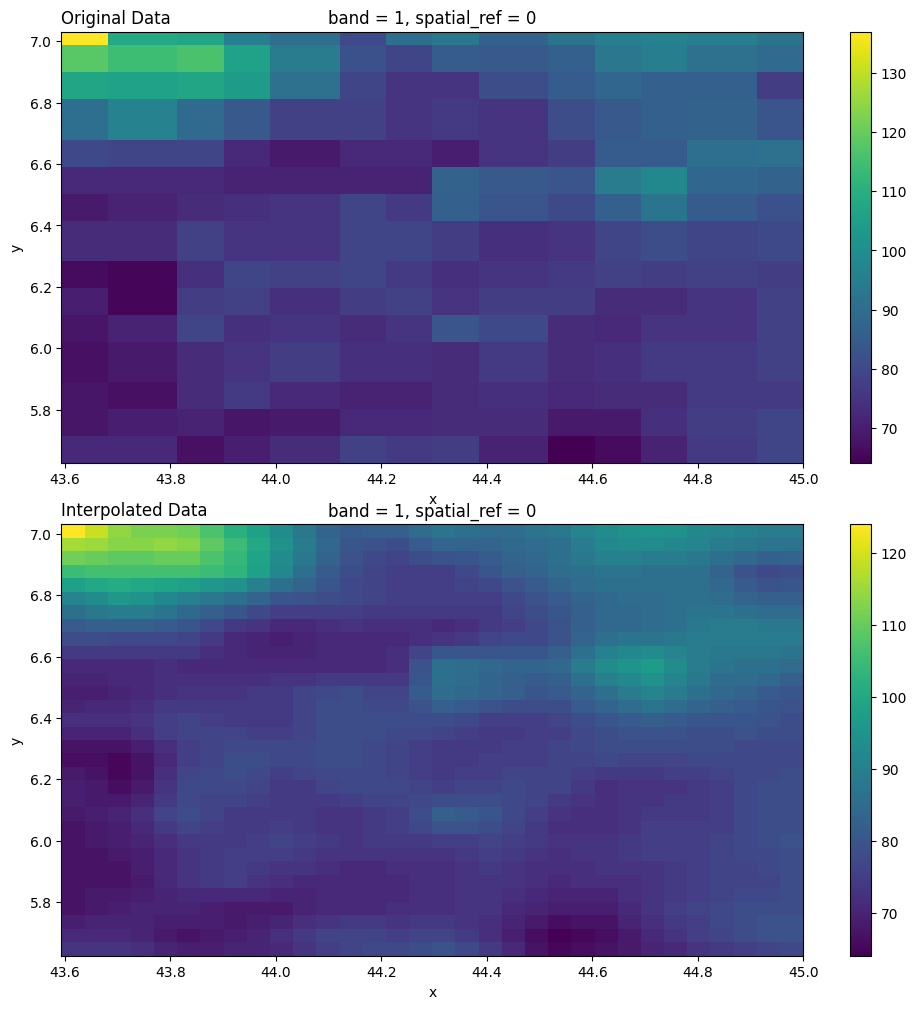

In [7]:
figure, axis = plt.subplots(nrows=2, figsize=(10,10))
axis[0].set_title('Original Data', loc='left')
axis[1].set_title('Interpolated Data', loc='left')

plt.tight_layout()
data.plot(ax=axis[0])
data_interpolation.plot(ax=axis[1])
